In [10]:
import pandas as pd

# Load the dataset to understand its structure and contents
file_path = 'depression.csv'
depression_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
depression_data.head()


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [11]:
# Data Cleaning and Encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
# Dropping the 'Name' column as it is not useful for the analysis
depression_data_cleaned = depression_data.drop(columns=['Name'])

# Columns requiring One-Hot Encoding (Non-ordinal categorical variables)
one_hot_columns = ['Marital Status', 'Smoking Status', 'Physical Activity Level', 
                   'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']

# Columns requiring Label Encoding (Ordinal categorical variables)
label_columns = ['Education Level', 'History of Mental Illness', 'History of Substance Abuse', 
                 'Family History of Depression', 'Chronic Medical Conditions']

# One-Hot Encoding using pandas get_dummies for simplicity
depression_data_encoded = pd.get_dummies(depression_data_cleaned, columns=one_hot_columns)

# Label Encoding the ordinal features
label_encoder = LabelEncoder()
for column in label_columns:
    depression_data_encoded[column] = label_encoder.fit_transform(depression_data_encoded[column])

# Displaying the first few rows of the cleaned and encoded dataset
print("\nCleaned and Encoded Dataset:")
print(depression_data_encoded.head())


Cleaned and Encoded Dataset:
   Age  Education Level  Number of Children     Income  \
0   31                1                   2   26265.67   
1   55                2                   1   42710.36   
2   78                3                   1  125332.79   
3   58                3                   3    9992.78   
4   18                2                   0    8595.08   

   History of Mental Illness  History of Substance Abuse  \
0                          1                           0   
1                          1                           0   
2                          0                           0   
3                          0                           0   
4                          1                           0   

   Family History of Depression  Chronic Medical Conditions  \
0                             1                           1   
1                             0                           1   
2                             1                           0   
3       

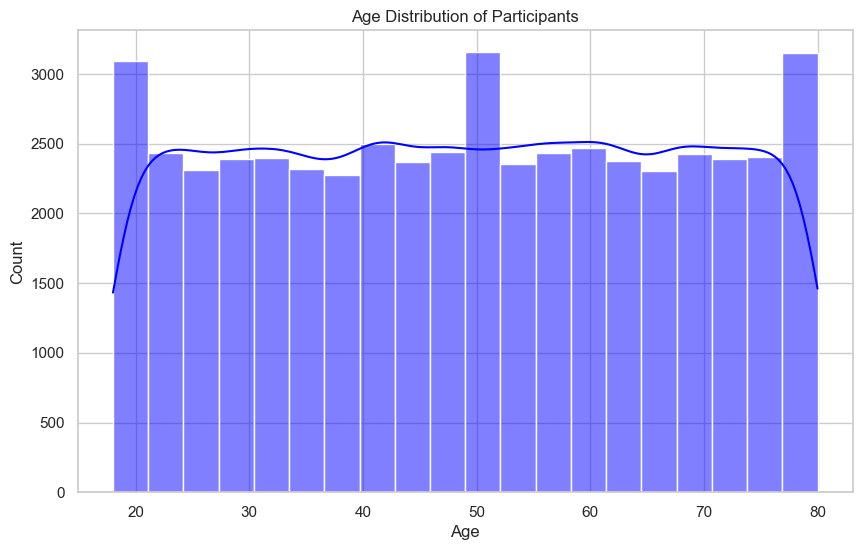

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Visualization 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(depression_data_encoded['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

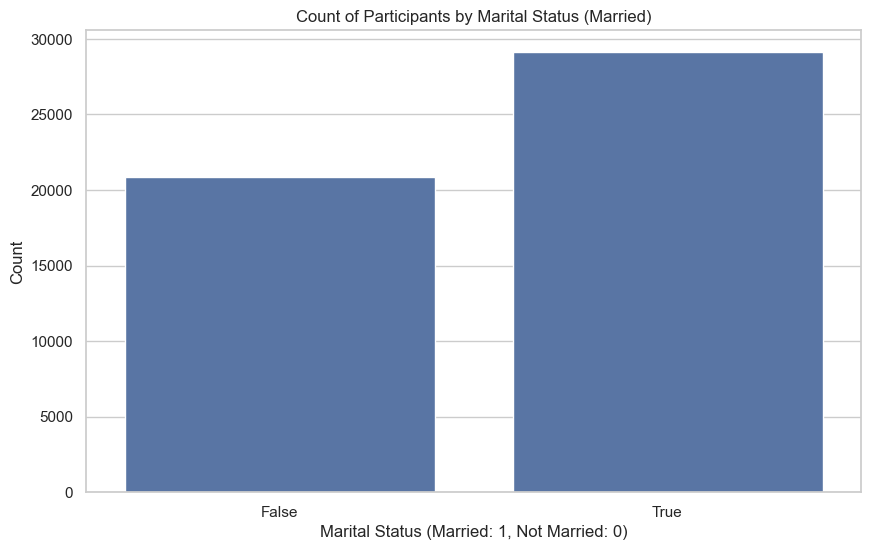

In [13]:
# Visualization 2: Count plot for Marital Status (Married)
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status_Married', data=depression_data_encoded)
plt.title('Count of Participants by Marital Status (Married)')
plt.xlabel('Marital Status (Married: 1, Not Married: 0)')
plt.ylabel('Count')
plt.show()

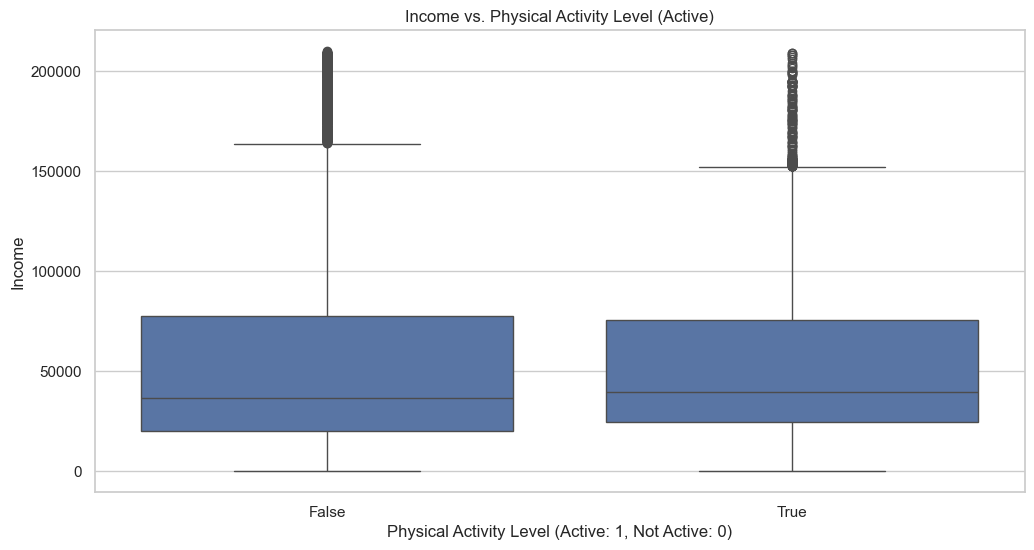

In [14]:
# Visualization 3: Income vs. Physical Activity Level (Active)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Physical Activity Level_Active', y='Income', data=depression_data_encoded)
plt.title('Income vs. Physical Activity Level (Active)')
plt.xlabel('Physical Activity Level (Active: 1, Not Active: 0)')
plt.ylabel('Income')
plt.show()

In [15]:
# Feature Engineering: Creating interaction features between socio-economic factors, lifestyle choices, and health conditions

# Creating an interaction feature between 'Income' and 'Physical Activity Level_Active'
depression_data_encoded['Income_PhysicalActivity'] = depression_data_encoded['Income'] * depression_data_encoded['Physical Activity Level_Active']

# Creating an interaction feature between 'Age' and 'Chronic Medical Conditions'
depression_data_encoded['Age_ChronicCondition'] = depression_data_encoded['Age'] * depression_data_encoded['Chronic Medical Conditions']

# Creating an interaction feature between 'Education Level' and 'Family History of Depression'
depression_data_encoded['Education_FamilyDepression'] = depression_data_encoded['Education Level'] * depression_data_encoded['Family History of Depression']

# Creating an interaction feature between 'Alcohol Consumption_High' and 'History of Mental Illness'
depression_data_encoded['Alcohol_HistoryMentalIllness'] = depression_data_encoded['Alcohol Consumption_High'] * depression_data_encoded['History of Mental Illness']

# Displaying the first few rows to verify the interaction features
print("Feature Engineered Dataset:")
print(depression_data_encoded.head())


Feature Engineered Dataset:
   Age  Education Level  Number of Children     Income  \
0   31                1                   2   26265.67   
1   55                2                   1   42710.36   
2   78                3                   1  125332.79   
3   58                3                   3    9992.78   
4   18                2                   0    8595.08   

   History of Mental Illness  History of Substance Abuse  \
0                          1                           0   
1                          1                           0   
2                          0                           0   
3                          0                           0   
4                          1                           0   

   Family History of Depression  Chronic Medical Conditions  \
0                             1                           1   
1                             0                           1   
2                             1                           0   
3         

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Defining the target variable (assuming 'History of Mental Illness' is the target for predicting depression risk)
target = 'History of Mental Illness'
X = depression_data_encoded.drop(columns=[target])
y = depression_data_encoded[target]

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7721
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6950
           1       1.00      0.25      0.40      3050

    accuracy                           0.77     10000
   macro avg       0.88      0.63      0.63     10000
weighted avg       0.83      0.77      0.72     10000



In [20]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7493
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      6950
           1       0.68      0.34      0.45      3050

    accuracy                           0.75     10000
   macro avg       0.72      0.63      0.65     10000
weighted avg       0.74      0.75      0.72     10000



In [21]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Accuracy:", gb_accuracy)
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7714
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6950
           1       0.99      0.25      0.40      3050

    accuracy                           0.77     10000
   macro avg       0.87      0.63      0.63     10000
weighted avg       0.83      0.77      0.72     10000



In [22]:
# Model Evaluation

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Defining a function to evaluate the models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

# Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)

# Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)

# Gradient Boosting
evaluate_model("Gradient Boosting", y_test, y_pred_gb)


Logistic Regression Model Evaluation:
Accuracy: 0.7721
Precision: 1.0000
Recall: 0.2528
F1 Score: 0.4036

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6950
           1       1.00      0.25      0.40      3050

    accuracy                           0.77     10000
   macro avg       0.88      0.63      0.63     10000
weighted avg       0.83      0.77      0.72     10000

--------------------------------------------------
Random Forest Model Evaluation:
Accuracy: 0.7493
Precision: 0.6762
Recall: 0.3416
F1 Score: 0.4539

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      6950
           1       0.68      0.34      0.45      3050

    accuracy                           0.75     10000
   macro avg       0.72      0.63      0.65     10000
weighted avg       0.74      0.75      0.72     10000

-------------------------------------------

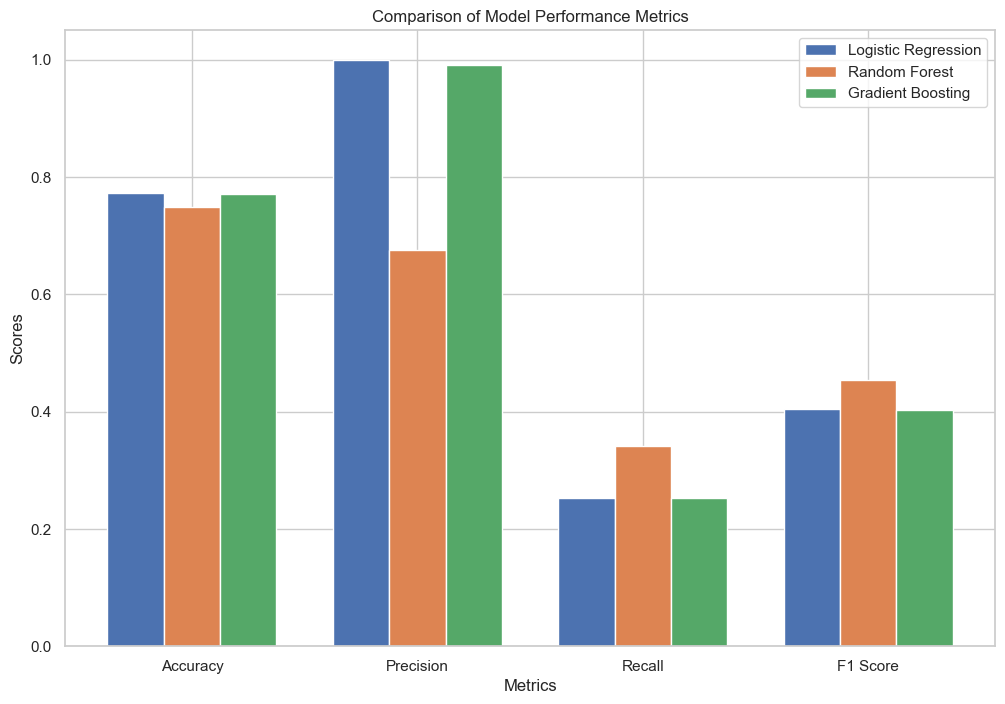

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Gathering the metrics for all models for comparison
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]

# Metrics: Accuracy, Precision, Recall, F1 Score
log_reg_metrics = [
    accuracy_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_log_reg),
    recall_score(y_test, y_pred_log_reg),
    f1_score(y_test, y_pred_log_reg),
]

rf_metrics = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf),
]

gb_metrics = [
    accuracy_score(y_test, y_pred_gb),
    precision_score(y_test, y_pred_gb),
    recall_score(y_test, y_pred_gb),
    f1_score(y_test, y_pred_gb),
]

metrics = np.array([log_reg_metrics, rf_metrics, gb_metrics])
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Plotting the metrics for visual comparison
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a bar chart for comparison
x = np.arange(len(metric_names))
width = 0.25

ax.bar(x - width, metrics[0], width, label=model_names[0])
ax.bar(x, metrics[1], width, label=model_names[1])
ax.bar(x + width, metrics[2], width, label=model_names[2])

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

plt.show()


In [15]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 3000x800 with 0 Axes>

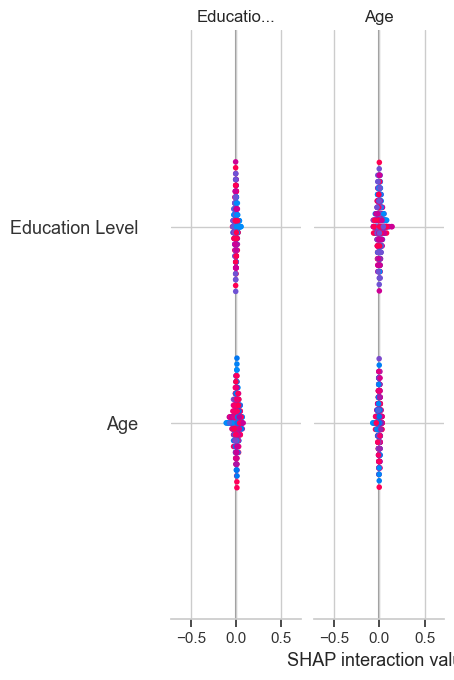

In [29]:
# Using SHAP for feature importance (optimized)
# Sampling a smaller subset for faster SHAP calculations
import shap


# Using SHAP for feature importance (optimized)
# Sampling a smaller subset for faster SHAP calculations
sample_size = 400  # Reduced sample size for faster execution
X_sample = X_test.sample(n=sample_size, random_state=42)

# Convert to float for SHAP compatibility
X_sample_float = X_sample.astype(float)

# SHAP explainer
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_sample_float)

# Ensure that the plot_type is explicitly set to "bar"
plt.figure(figsize=(30, 8))  # Increase the figure size for better visibility
shap.summary_plot(shap_values, X_sample_float, plot_type="bar")